In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
from sklearn.model_selection import train_test_split

# Set display options
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# 1. Load the data
print("Loading data...")
data = pd.read_csv("Data_Entry_2017.csv")

# 2. Initial exploration
print("Data shape:", data.shape)
print("\nFirst 5 rows:")
data.head()

Loading data...
Data shape: (112120, 12)

First 5 rows:


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [10]:
print("Data information:")
data.info()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memor

In [11]:
print("\nSummary statistics:")
data.describe()


Summary statistics:


,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [12]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Image Index                         0
Finding Labels                      0
Follow-up #                         0
Patient ID                          0
Patient Age                         0
Patient Gender                      0
View Position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    112120
dtype: int64


## Parse the 'Finding Labels' column since it contains multiple labels per image

In [13]:
print("\nExamining the 'Finding Labels' column...")
print("Sample labels:", data['Finding Labels'].head(10).tolist())


Examining the 'Finding Labels' column...
Sample labels: ['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion', 'No Finding', 'Hernia', 'Hernia', 'Hernia', 'Hernia|Infiltration', 'Hernia', 'Hernia']


## Let's extract unique findings and count their occurrences

In [14]:
all_labels = []
for label_string in data['Finding Labels']:
    labels = label_string.split('|')
    all_labels.extend(labels)

label_counts = Counter(all_labels)
print("\nFrequency of each finding:")
for label, count in label_counts.most_common():
    print(f"{label}: {count}")


Frequency of each finding:
No Finding: 60361
Infiltration: 19894
Effusion: 13317
Atelectasis: 11559
Nodule: 6331
Mass: 5782
Pneumothorax: 5302
Consolidation: 4667
Pleural_Thickening: 3385
Cardiomegaly: 2776
Emphysema: 2516
Edema: 2303
Fibrosis: 1686
Pneumonia: 1431
Hernia: 227


## Create binary indicator columns for each finding

In [15]:
print("\nCreating binary indicators for each finding...")
findings = sorted(list(set(all_labels)))
for finding in findings:
    data[finding] = data['Finding Labels'].apply(lambda x: 1 if finding in x else 0)

print("\nVerification of created indicators:")
print(data[['Finding Labels'] + findings].head())


Creating binary indicators for each finding...

Verification of created indicators:
           Finding Labels  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0            Cardiomegaly            0             1              0      0   
1  Cardiomegaly|Emphysema            0             1              0      0   
2   Cardiomegaly|Effusion            0             1              0      0   
3              No Finding            0             0              0      0   
4                  Hernia            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  No Finding  \
0         0          0         0       0             0     0           0   
1         0          1         0       0             0     0           0   
2         1          0         0       0             0     0           0   
3         0          0         0       0             0     0           1   
4         0          0         0       1             0     0      

## Visualize the distribution of findings

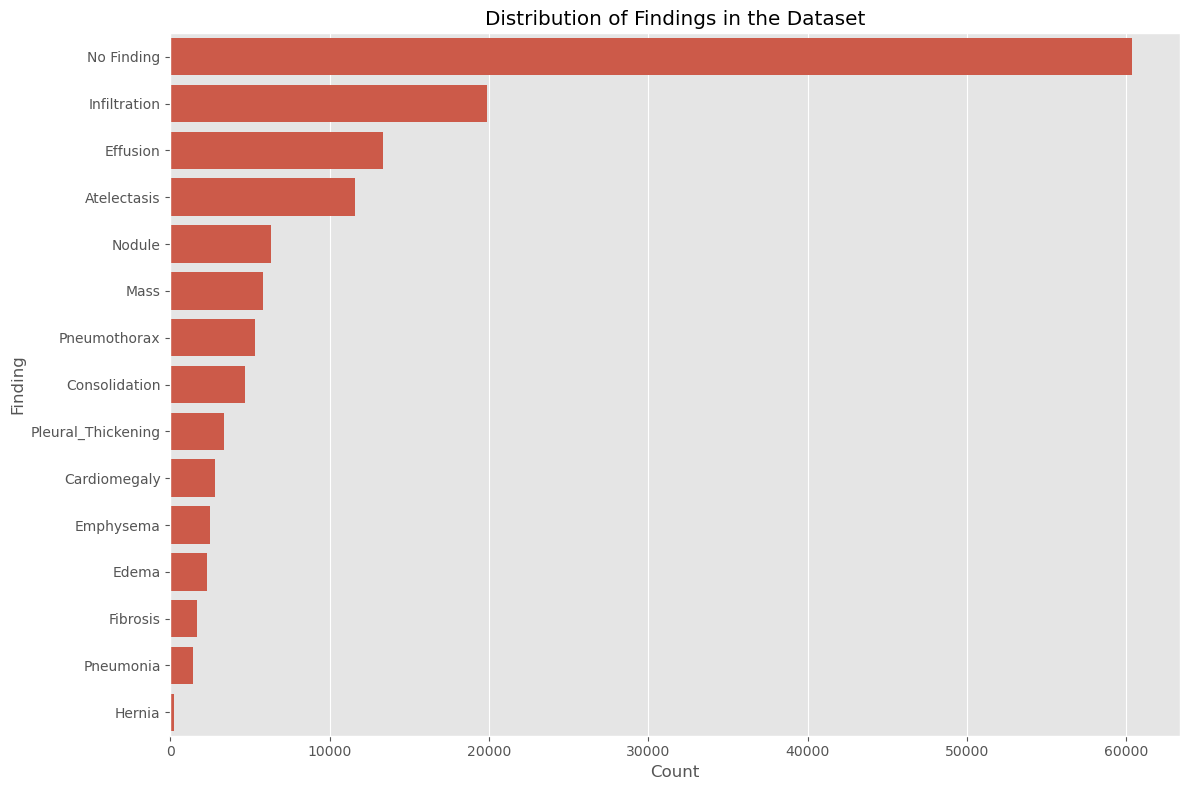

In [16]:
plt.figure(figsize=(12, 8))
label_counts_df = pd.DataFrame({
    'Finding': list(label_counts.keys()),
    'Count': list(label_counts.values())
}).sort_values('Count', ascending=False)

sns.barplot(x='Count', y='Finding', data=label_counts_df)
plt.title('Distribution of Findings in the Dataset')
plt.xlabel('Count')
plt.ylabel('Finding')
plt.tight_layout()
plt.show()

## Sample 1000 images per class


Sampling 1000 images per class...
Total samples after combining all findings: 12169

Distribution in sampled dataset:
Atelectasis: 2637
Cardiomegaly: 1226
Consolidation: 1601
Edema: 1267
Effusion: 3270
Emphysema: 1252
Fibrosis: 1077
Hernia: 227
Infiltration: 3687
Mass: 1788
Nodule: 1722
Pleural_Thickening: 1425
Pneumonia: 1102
Pneumothorax: 1641


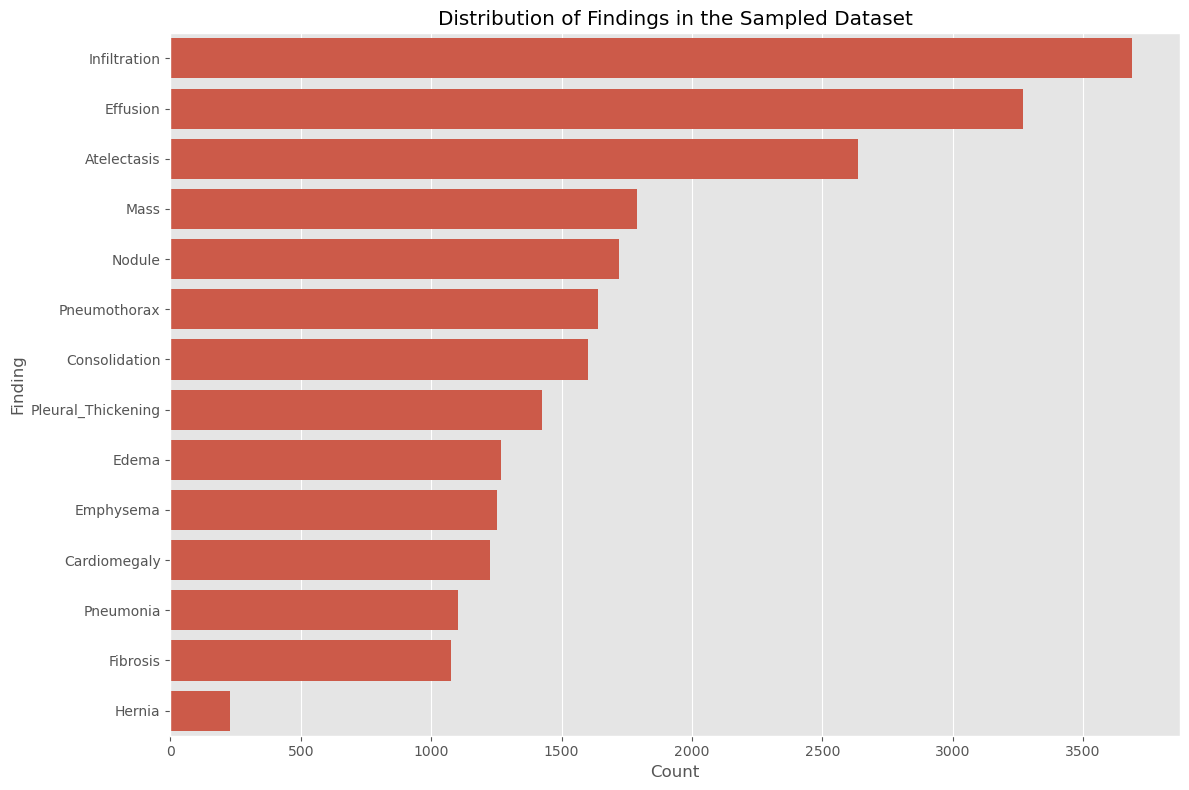

In [17]:
print("\nSampling 1000 images per class...")

# Create a dictionary to store the sampled data for each finding
sampled_data_dict = {}

for finding in findings:
    # Skip 'No Finding' as it's a special case
    if finding == 'No Finding':
        continue
    
    # Get all images with this finding
    positive_samples = data[data[finding] == 1]
    
    # Sample 1000 images or all if less than 1000
    if len(positive_samples) > 1000:
        sampled_positive = positive_samples.sample(n=1000, random_state=42)
    else:
        sampled_positive = positive_samples
        print(f"Warning: Only {len(positive_samples)} samples available for {finding}")
    
    sampled_data_dict[finding] = sampled_positive

# Combine all sampled data
sampled_data = pd.concat(sampled_data_dict.values()).drop_duplicates()
print(f"Total samples after combining all findings: {len(sampled_data)}")

# Count the distribution in our sampled dataset
sampled_counts = {}
for finding in findings:
    if finding == 'No Finding':
        continue
    sampled_counts[finding] = sampled_data[finding].sum()

print("\nDistribution in sampled dataset:")
for finding, count in sampled_counts.items():
    print(f"{finding}: {count}")

# 9. Visualize the distribution in our sampled dataset
plt.figure(figsize=(12, 8))
sampled_counts_df = pd.DataFrame({
    'Finding': list(sampled_counts.keys()),
    'Count': list(sampled_counts.values())
}).sort_values('Count', ascending=False)

sns.barplot(x='Count', y='Finding', data=sampled_counts_df)
plt.title('Distribution of Findings in the Sampled Dataset')
plt.xlabel('Count')
plt.ylabel('Finding')
plt.tight_layout()
plt.show()

## Train-test split

In [18]:
print("\nPerforming train-test split...")

# Features will be the image paths
X = sampled_data['Image Index'].values
# Let's use all the finding indicators as our multi-label target
y = sampled_data[findings].values

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# 11. Save train and test sets for future use
train_df = pd.DataFrame({'Image Index': X_train})
test_df = pd.DataFrame({'Image Index': X_test})

for i, finding in enumerate(findings):
    train_df[finding] = y_train[:, i]
    test_df[finding] = y_test[:, i]

print("\nSample of training data:")
train_df.head()


Performing train-test split...
Training set: 9735 samples
Test set: 2434 samples

Sample of training data:


,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00023140_002.png,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,00014637_003.png,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,00002759_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,00012228_000.png,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
4,00011226_004.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


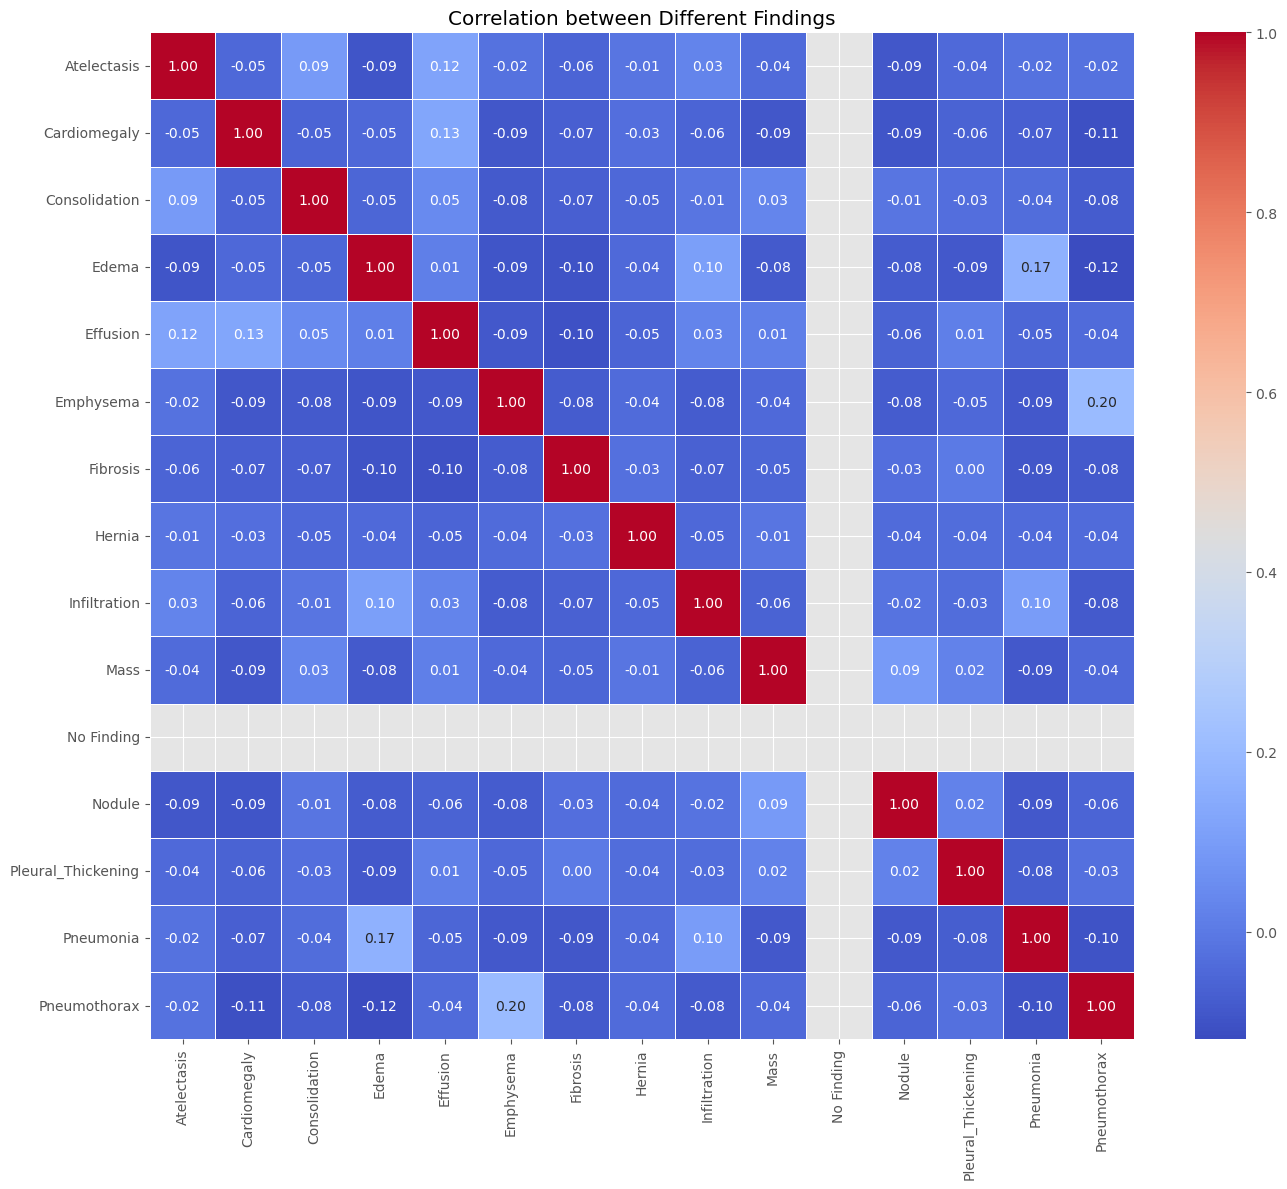

In [19]:
# Calculate correlation matrix
correlation_matrix = sampled_data[findings].corr()
# Visualize the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation between Different Findings')
plt.tight_layout()
plt.show()

In [20]:
# Summary statistics
print("\nSummary of the prepared dataset:")
print(f"- Original dataset size: {len(data)} samples")
print(f"- Sampled dataset size: {len(sampled_data)} samples")
print(f"- Training set: {len(X_train)} samples")
print(f"- Test set: {len(X_test)} samples")
print(f"- Number of finding categories: {len(findings)}")


Summary of the prepared dataset:
- Original dataset size: 112120 samples
- Sampled dataset size: 12169 samples
- Training set: 9735 samples
- Test set: 2434 samples
- Number of finding categories: 15




Analyzing multiple vs single findings per image...


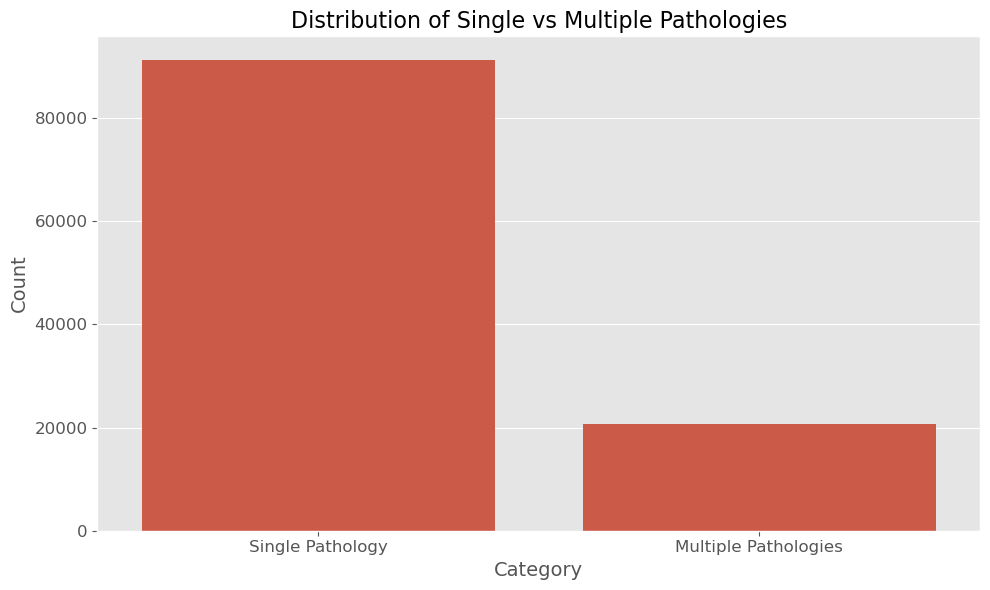

In [21]:
print("\n\nAnalyzing multiple vs single findings per image...")

# Create a new column to count the number of findings per image
data['Finding_Count'] = data['Finding Labels'].apply(lambda x: len(x.split('|')))

# Create a category column (Single vs Multiple Pathologies)
data['Category'] = data['Finding_Count'].apply(lambda x: 'Multiple Pathologies' if x > 1 else 'Single Pathology')

# Visualize single vs multiple pathologies
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=data)
plt.title('Distribution of Single vs Multiple Pathologies', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

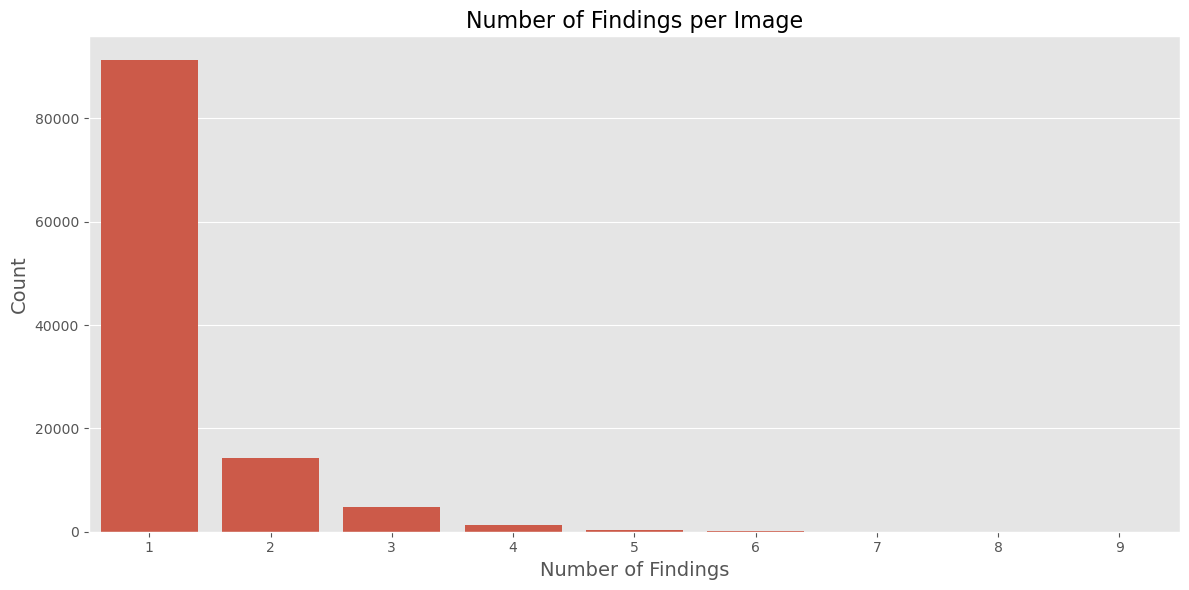

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Finding_Count', data=data)
plt.title('Number of Findings per Image', fontsize=16)
plt.xlabel('Number of Findings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

## Compare distribution of single vs multiple pathologies for each finding

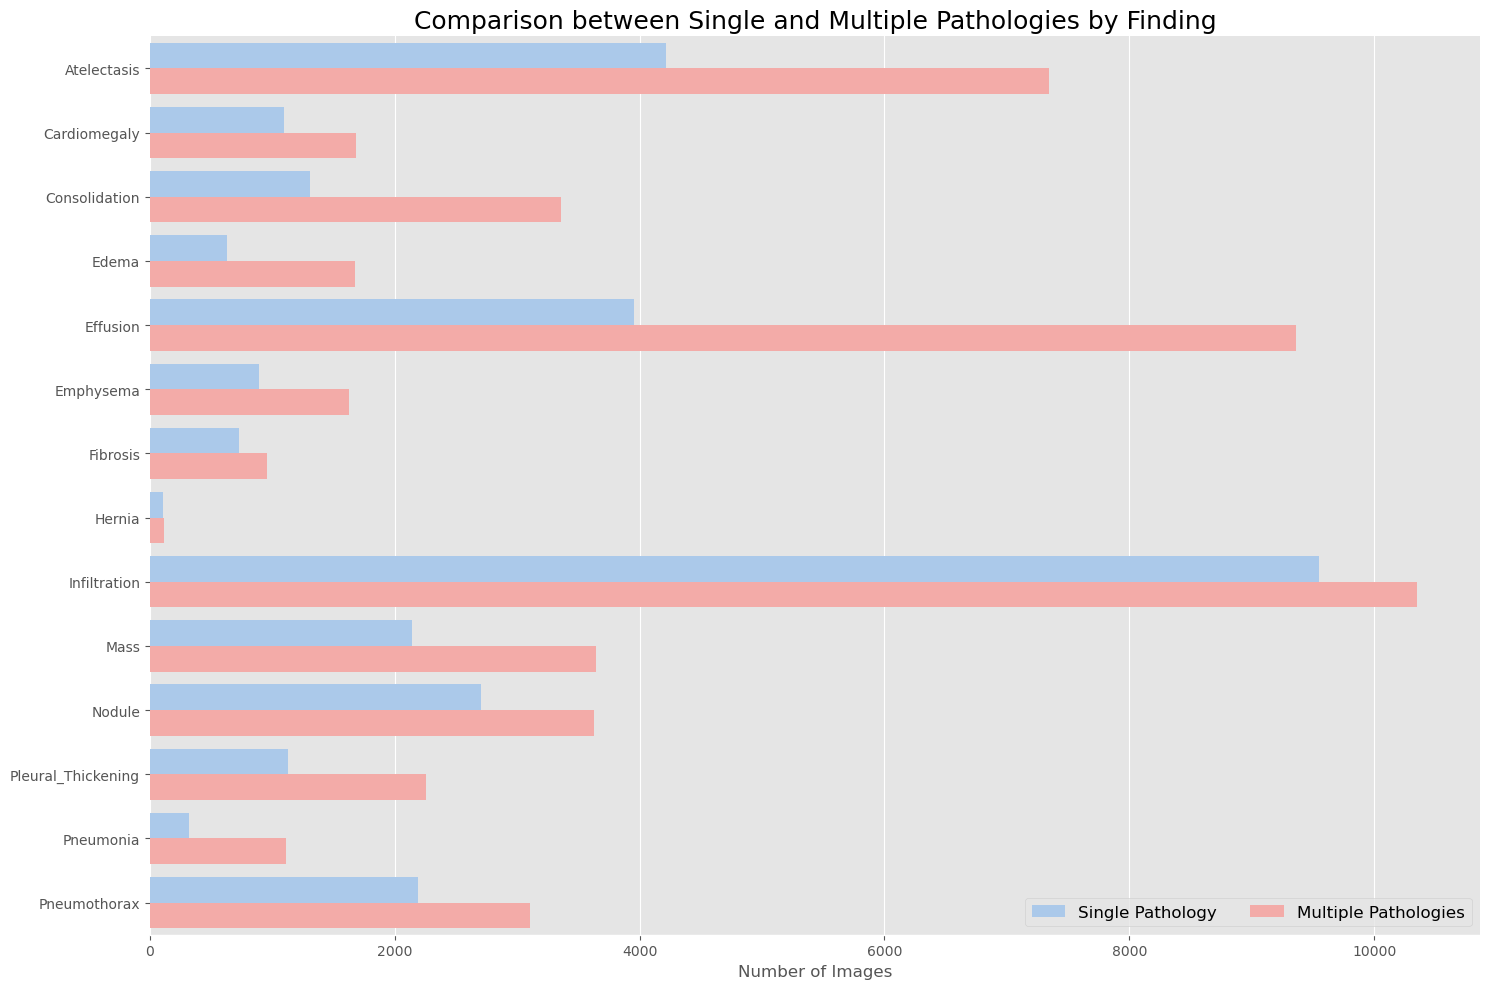

In [23]:
findings_by_category = pd.DataFrame()
for finding in findings:
    if finding == 'No Finding':
        continue
    # Get counts for single and multiple pathologies
    single_count = len(data[(data[finding] == 1) & (data['Category'] == 'Single Pathology')])
    multiple_count = len(data[(data[finding] == 1) & (data['Category'] == 'Multiple Pathologies')])
    findings_by_category = pd.concat([findings_by_category, pd.DataFrame({
        'Finding': [finding, finding],
        'Category': ['Single Pathology', 'Multiple Pathologies'],
        'Count': [single_count, multiple_count]
    })])

# Plot the comparison
f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel")
g = sns.barplot(x='Count', y='Finding', hue='Category', data=findings_by_category, 
                palette={"Single Pathology": "b", "Multiple Pathologies": "r"})
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=12)
ax.set(xlabel="Number of Images", ylabel="")
ax.set_title("Comparison between Single and Multiple Pathologies by Finding", fontsize=18)
sns.despine(left=True)
plt.tight_layout()
plt.show()



Analyzing patient demographics...


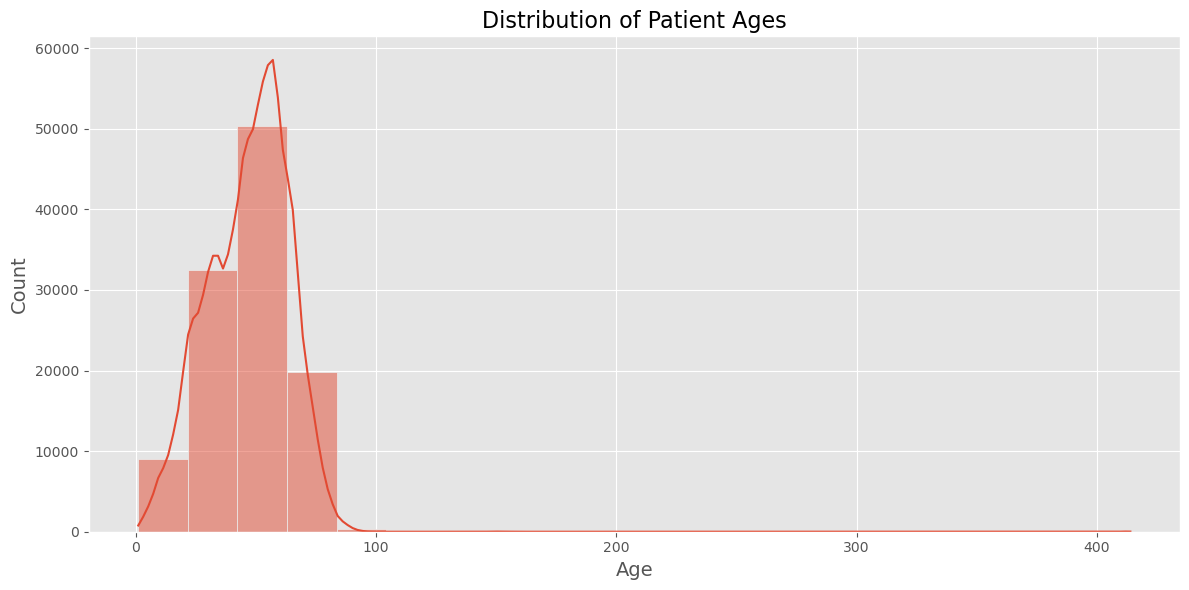

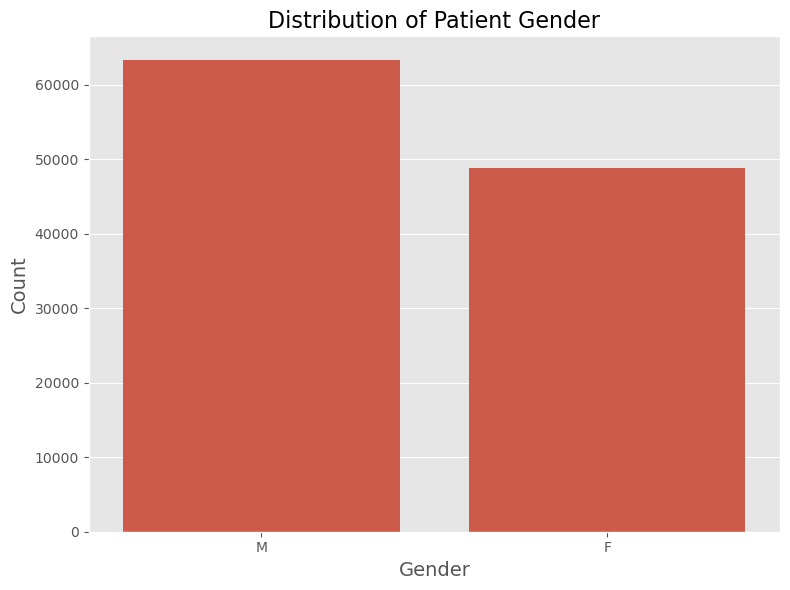

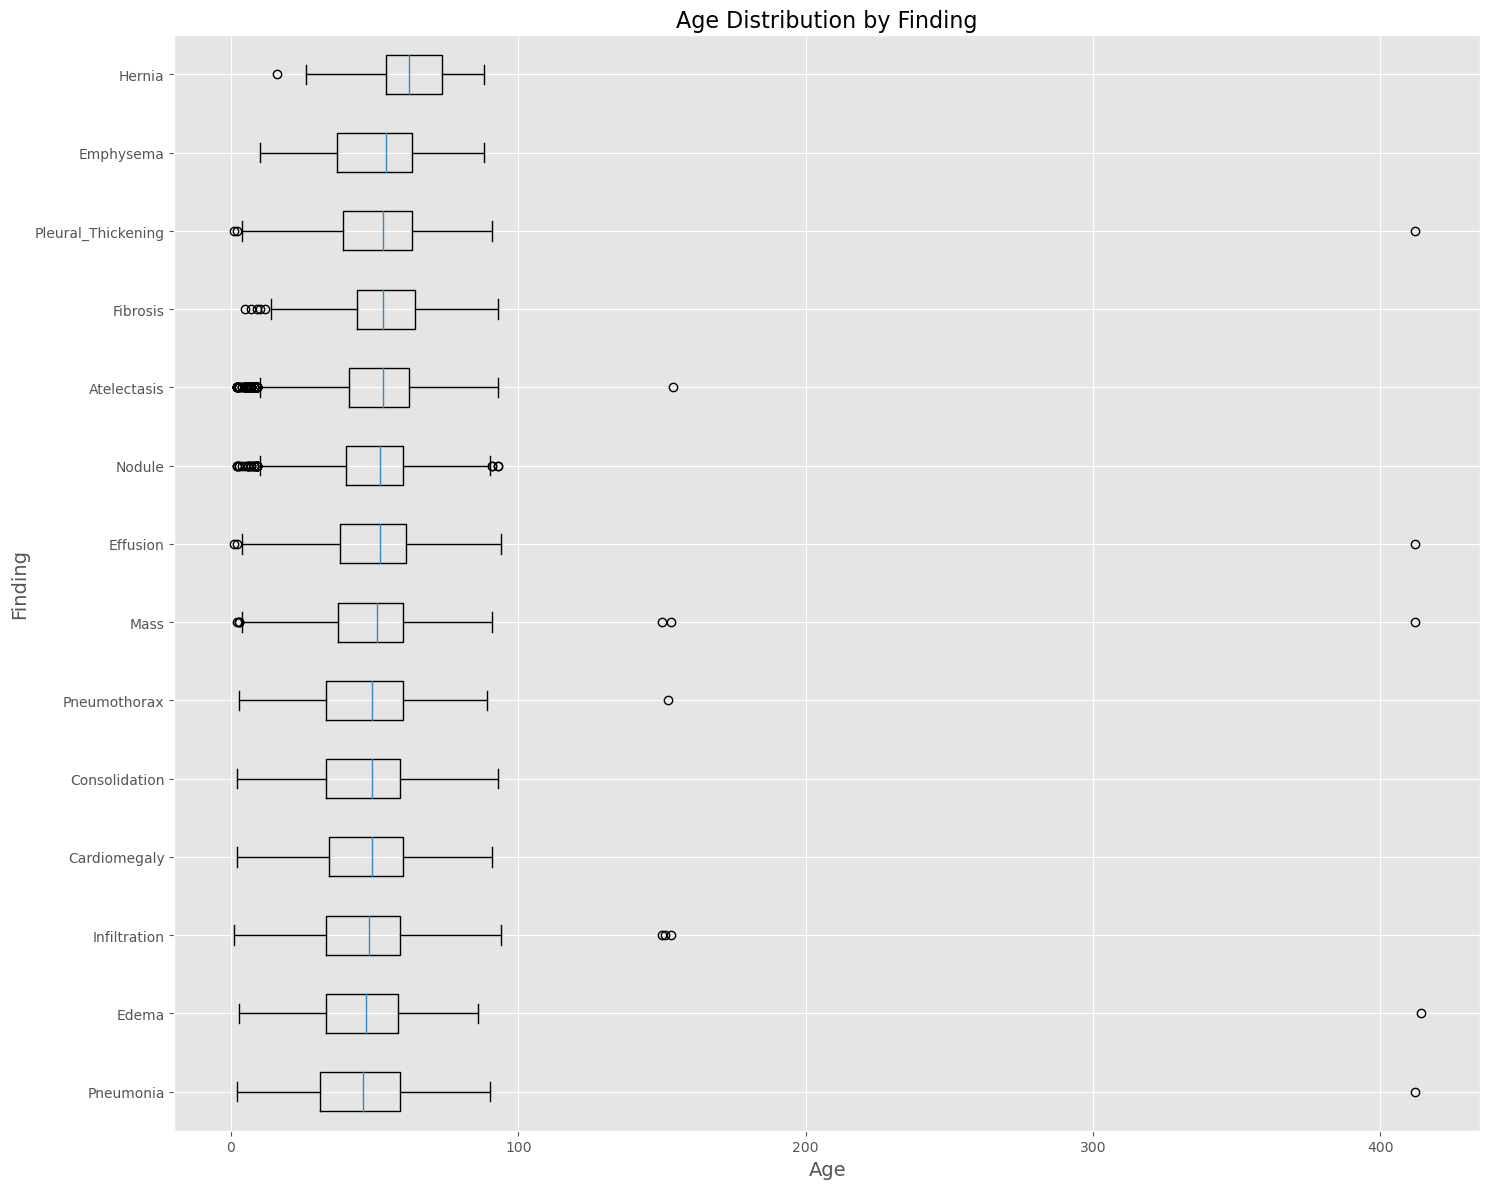

In [24]:
print("\n\nAnalyzing patient demographics...")

# Extract patient gender and age from the patient ID if available
if 'Patient Age' in data.columns and 'Patient Gender' in data.columns:
    # Age distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(data['Patient Age'], bins=20, kde=True)
    plt.title('Distribution of Patient Ages', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Gender distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Patient Gender', data=data)
    plt.title('Distribution of Patient Gender', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Age distribution by finding
    plt.figure(figsize=(15, 12))
    finding_age_data = []
    for finding in findings:
        if finding == 'No Finding':
            continue
        ages = data[data[finding] == 1]['Patient Age'].values
        finding_age_data.append((finding, ages))
    
    # Sort findings by median age
    finding_age_data.sort(key=lambda x: np.median(x[1]))
    
    # Create boxplot
    boxplot_data = []
    boxplot_labels = []
    for finding, ages in finding_age_data:
        boxplot_data.append(ages)
        boxplot_labels.append(finding)
    
    plt.boxplot(boxplot_data, labels=boxplot_labels, vert=False)
    plt.title('Age Distribution by Finding', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Finding', fontsize=14)
    plt.tight_layout()
    plt.show()

## Prepare an analysis of the most common co-occurrences



Analyzing most common co-occurring findings...


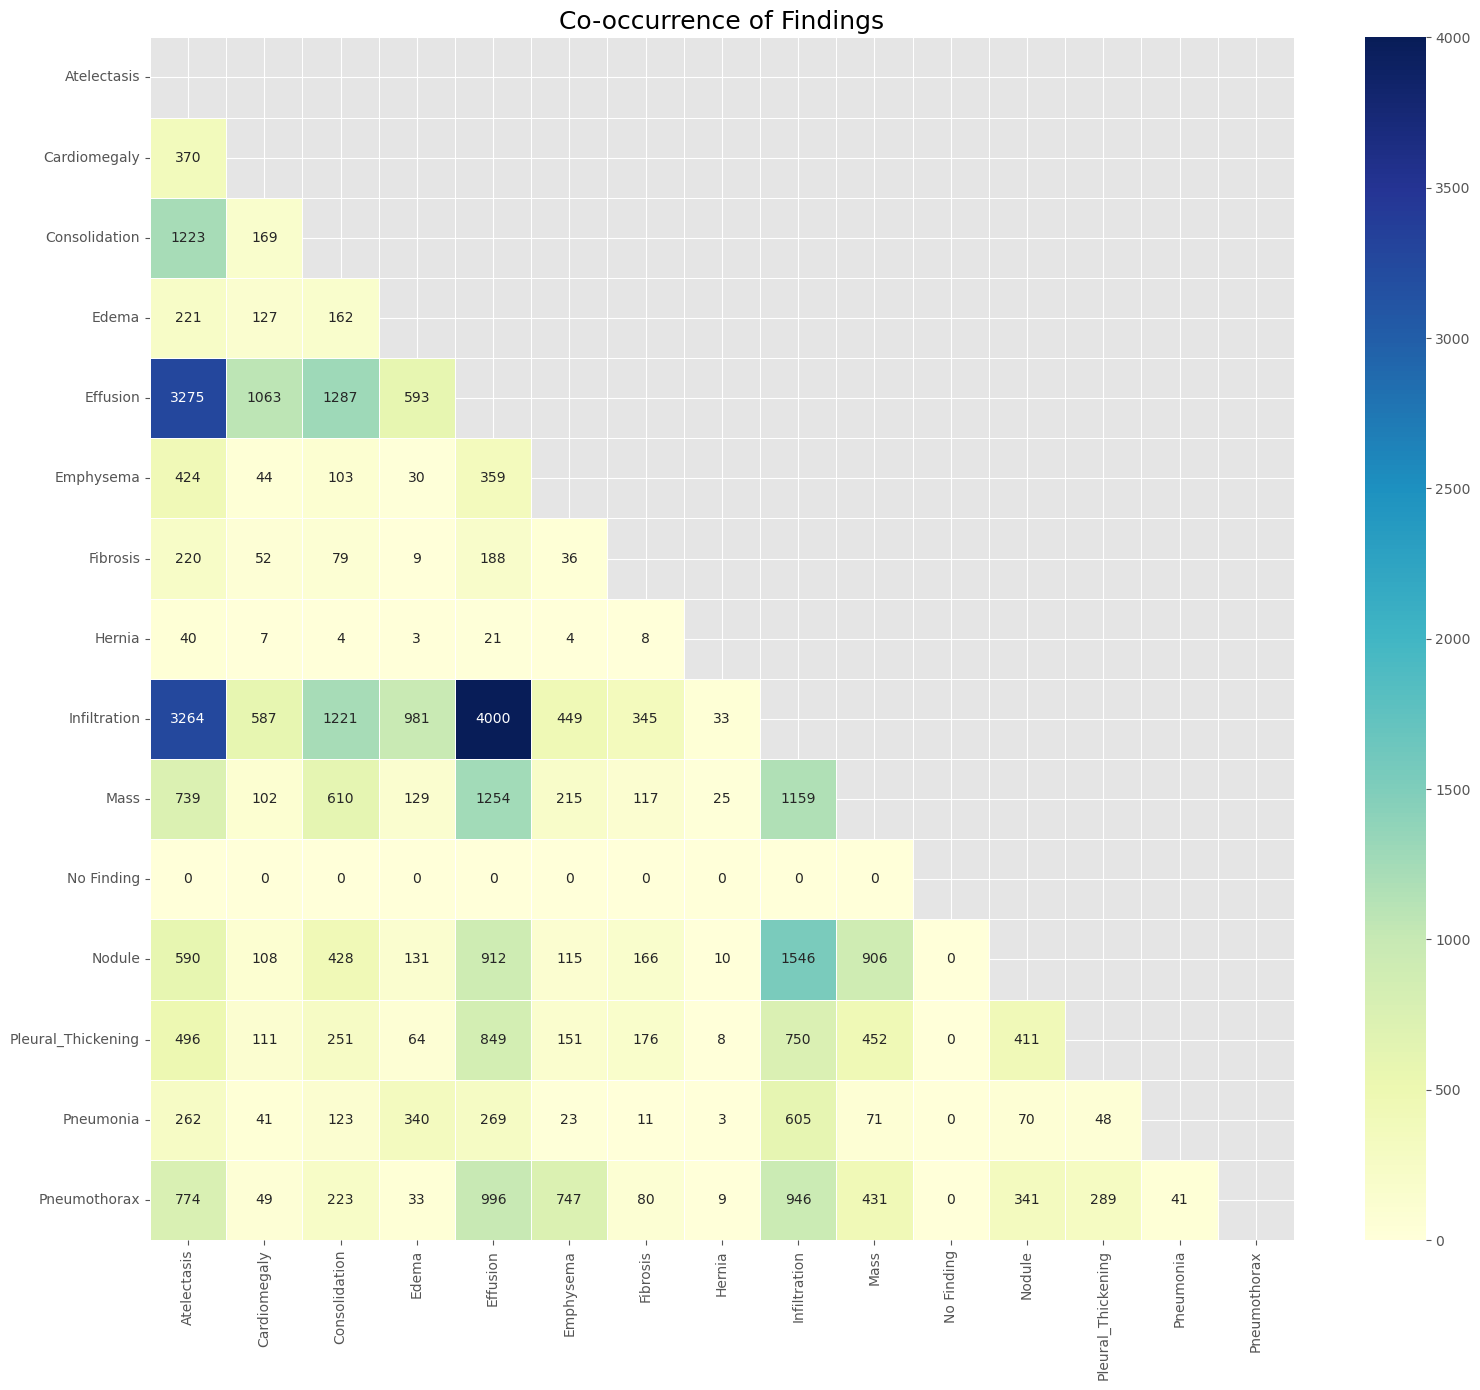

Top 15 co-occurring findings:
        Finding 1      Finding 2   Count
0        Effusion   Infiltration  4000.0
1     Atelectasis       Effusion  3275.0
2     Atelectasis   Infiltration  3264.0
3    Infiltration         Nodule  1546.0
4   Consolidation       Effusion  1287.0
5        Effusion           Mass  1254.0
6     Atelectasis  Consolidation  1223.0
7   Consolidation   Infiltration  1221.0
8    Infiltration           Mass  1159.0
9    Cardiomegaly       Effusion  1063.0
10       Effusion   Pneumothorax   996.0
11          Edema   Infiltration   981.0
12   Infiltration   Pneumothorax   946.0
13       Effusion         Nodule   912.0
14           Mass         Nodule   906.0


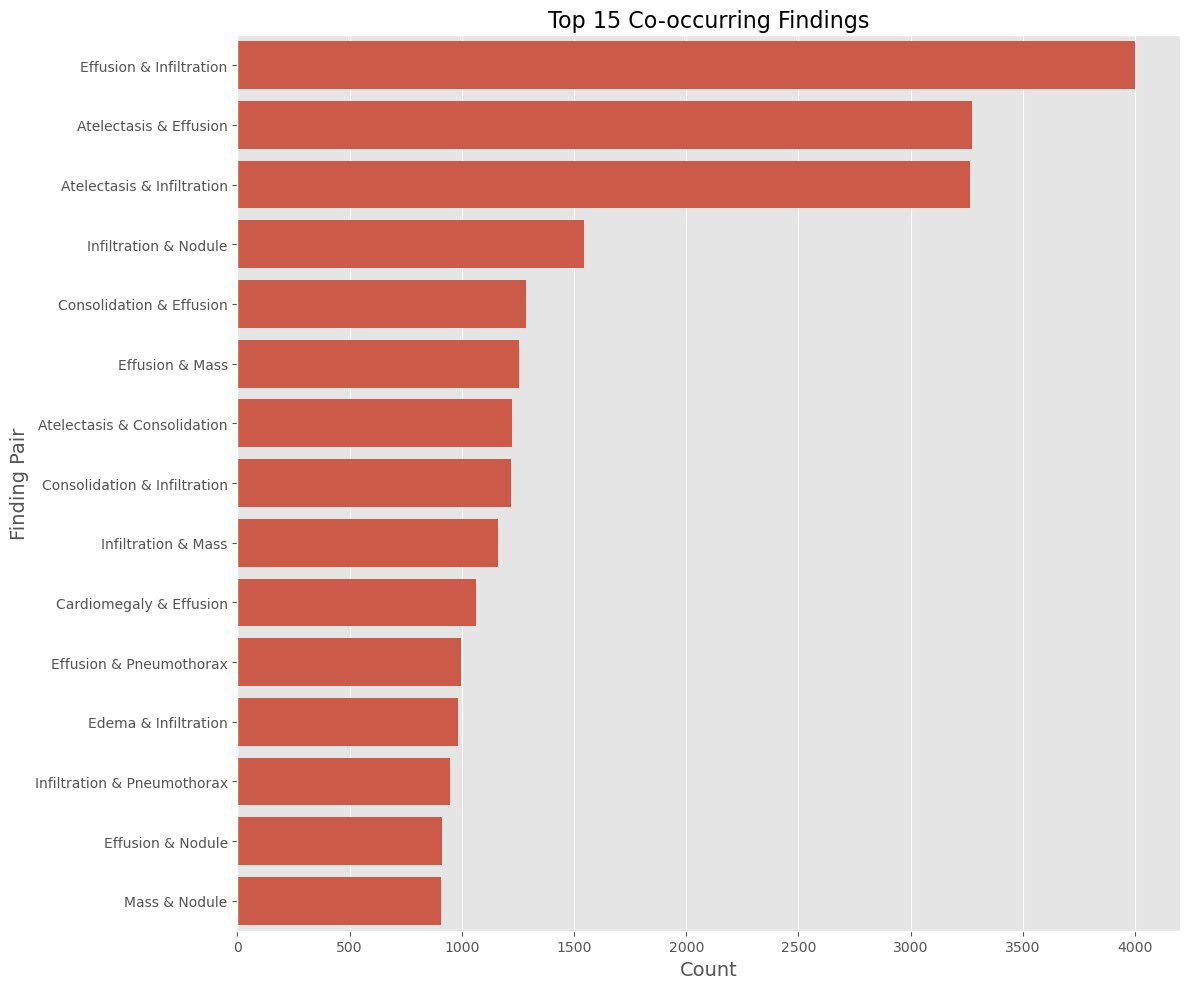

In [25]:
print("\n\nAnalyzing most common co-occurring findings...")

# Get data with multiple findings
multi_finding_data = data[data['Finding_Count'] > 1]

# Create a co-occurrence matrix
cooccurrence = np.zeros((len(findings), len(findings)))

# Fill the co-occurrence matrix
for _, row in multi_finding_data.iterrows():
    for i in range(len(findings)):
        for j in range(i+1, len(findings)):
            if row[findings[i]] == 1 and row[findings[j]] == 1:
                cooccurrence[i, j] += 1
                cooccurrence[j, i] += 1

# Convert to DataFrame for easier visualization
cooccurrence_df = pd.DataFrame(cooccurrence, index=findings, columns=findings)

# Visualize the co-occurrence matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(cooccurrence, dtype=bool))
sns.heatmap(cooccurrence_df, annot=True, fmt='.0f', mask=mask, cmap='YlGnBu', linewidths=0.5)
plt.title('Co-occurrence of Findings', fontsize=18)
plt.tight_layout()
plt.show()

# Find top 15 co-occurring pairs
cooccurrence_list = []
for i in range(len(findings)):
    for j in range(i+1, len(findings)):
        cooccurrence_list.append((findings[i], findings[j], cooccurrence[i, j]))

# Sort by co-occurrence count
cooccurrence_list.sort(key=lambda x: x[2], reverse=True)

# Display top 15
top_cooccurrences = pd.DataFrame(cooccurrence_list[:15], columns=['Finding 1', 'Finding 2', 'Count'])
print("Top 15 co-occurring findings:")
print(top_cooccurrences)

# Plot top 15 co-occurring pairs
plt.figure(figsize=(12, 10))
top_cooccurrences['Pair'] = top_cooccurrences['Finding 1'] + ' & ' + top_cooccurrences['Finding 2']
sns.barplot(y='Pair', x='Count', data=top_cooccurrences)
plt.title('Top 15 Co-occurring Findings', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Finding Pair', fontsize=14)
plt.tight_layout()
plt.show()

In [26]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm as tqdm_notebook   # Better for Jupyter
from IPython.display import display, clear_output

def load_chest_xray_dataset_from_df(df, image_folders, max_images=None):
    """
    Load chest X-ray images and their corresponding labels from an existing dataframe.
    
    Args:
        df (DataFrame): Pandas DataFrame containing image metadata and labels
        image_folders (list): List of folder paths containing the images
        max_images (int, optional): Maximum number of images to load (for memory management)
    
    Returns:
        tuple: (images, labels, filtered_df)
            - images: List of loaded image arrays
            - labels: Dictionary mapping each disease to its binary labels
            - filtered_df: Pandas DataFrame with filtered rows for found images
    """
    # Display a preview of the dataframe
    print("Using existing dataframe:")
    display(df.head())
    
    # List of all possible findings/diseases in the dataset
    diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 
                'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 
                'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
    
    # Create a dictionary to store all available image paths
    available_images = {}
    
    # Find all image files across the specified folders
    print("Scanning image folders...")
    progress_bar = tqdm_notebook(image_folders)
    for folder in progress_bar:
        progress_bar.set_description(f"Scanning {os.path.basename(folder)}")
        
        if not os.path.exists(folder):
            print(f"Warning: Folder {folder} does not exist")
            continue
            
        image_files = glob.glob(os.path.join(folder, "*.png"))
        for img_path in image_files:
            img_name = os.path.basename(img_path)
            available_images[img_name] = img_path
    
    print(f"Found {len(available_images)} images across all folders")
    
    # Filter the dataframe to include only images that were found
    found_images = df['Image Index'].isin(available_images.keys())
    filtered_df = df[found_images].copy()
    
    print(f"Matched {len(filtered_df)} images with entries in the dataframe")
    
    if len(filtered_df) == 0:
        print("No matching images found. Check image paths and dataframe.")
        return [], {}, filtered_df
    
    # Apply maximum images limit if specified
    if max_images and len(filtered_df) > max_images:
        print(f"Limiting to {max_images} images to conserve memory")
        filtered_df = filtered_df.sample(max_images, random_state=42)
    
    # Load images and labels
    images = []
    labels = {disease: [] for disease in diseases}
    
    # Progress bar for image loading
    print("Loading images and extracting labels...")
    progress_bar = tqdm_notebook(filtered_df.iterrows(), total=len(filtered_df))
    
    for idx, row in progress_bar:
        img_name = row['Image Index']
        progress_bar.set_description(f"Loading {img_name}")
        
        img_path = available_images[img_name]
        
        # Load and convert image to numpy array
        try:
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)
            
            # Extract labels for each disease
            for disease in diseases:
                if disease in row:  # Make sure the column exists
                    labels[disease].append(int(row[disease]))
                else:
                    print(f"Warning: Disease {disease} not found in dataframe")
                
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")
            continue
    
    # Convert label lists to numpy arrays
    for disease in diseases:
        if labels[disease]:  # Check if list is not empty
            labels[disease] = np.array(labels[disease])
    
    # Display a summary
    print(f"\nSuccessfully loaded {len(images)} images")
    
    # Show an example image
    if images:
        plt.figure(figsize=(6, 6))
        plt.imshow(images[0], cmap='gray')
        plt.axis('off')
        plt.title("Example Image")
        plt.show()
    
    return images, labels, filtered_df


Loading training images:
Using existing dataframe:


,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00023140_002.png,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,00014637_003.png,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,00002759_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,00012228_000.png,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
4,00011226_004.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Scanning image folders...


Scanning images: 100%|██████████| 12/12 [00:01<00:00, 10.98it/s]


Found 112120 images across all folders
Matched 9735 images with entries in the dataframe
Limiting to 1000 images to conserve memory
Loading images and extracting labels...


Loading 00022132_002.png: 100%|██████████| 1000/1000 [00:15<00:00, 62.69it/s]



Successfully loaded 1000 images


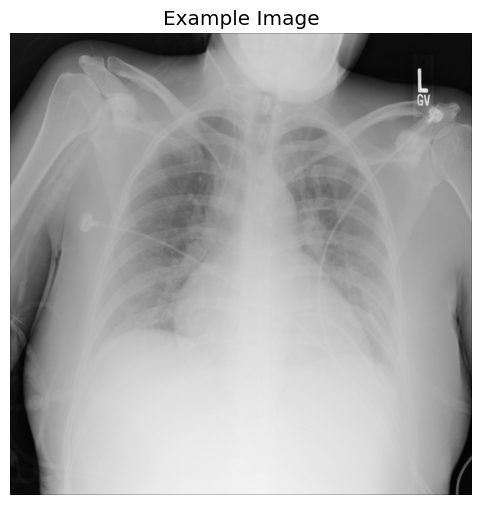

In [27]:
# Assuming train_df and test_df already exist in your notebook

# Define image folders
image_folders = [f"images_{str(i).zfill(3)}/images" for i in range(1, 13)]

# Load training images
print("Loading training images:")
train_images, train_labels, filtered_train_df = load_chest_xray_dataset_from_df(
    train_df, image_folders, max_images=1000)  # Limit to 1000 for memory

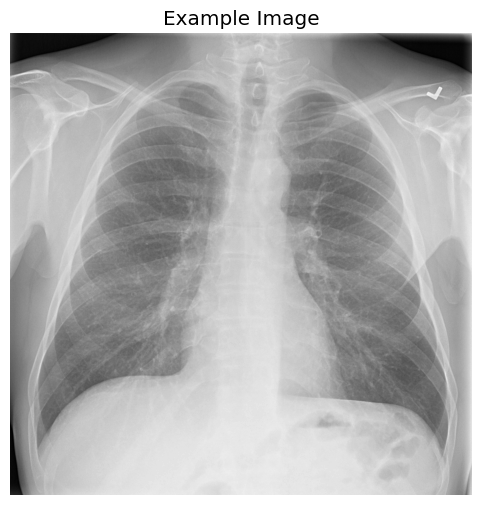

In [32]:
plt.figure(figsize=(6, 6))
plt.imshow(train_images[45], cmap='gray')
plt.axis('off')
plt.title("Example Image")
plt.show()

In [29]:
# EDA functions for chest X-ray images in Jupyter

def analyze_image_properties(images):
    """Analyze basic properties of the images"""
    # Get image dimensions
    heights = []
    widths = []
    aspect_ratios = []
    mean_intensities = []
    std_intensities = []
    
    for img in images:
        if len(img.shape) == 3 and img.shape[2] > 1:
            # Convert to grayscale if needed
            img_gray = np.mean(img, axis=2).astype(np.uint8)
        else:
            img_gray = img
            
        h, w = img_gray.shape[:2]
        heights.append(h)
        widths.append(w)
        aspect_ratios.append(w/h)
        mean_intensities.append(np.mean(img_gray))
        std_intensities.append(np.std(img_gray))
    
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    
    # Plot height distribution
    axes[0, 0].hist(heights, bins=20)
    axes[0, 0].set_title('Image Height Distribution')
    axes[0, 0].set_xlabel('Height (pixels)')
    axes[0, 0].set_ylabel('Count')
    
    # Plot width distribution
    axes[0, 1].hist(widths, bins=20)
    axes[0, 1].set_title('Image Width Distribution')
    axes[0, 1].set_xlabel('Width (pixels)')
    
    # Plot aspect ratio distribution
    axes[0, 2].hist(aspect_ratios, bins=20)
    axes[0, 2].set_title('Aspect Ratio Distribution')
    axes[0, 2].set_xlabel('Width/Height Ratio')
    
    # Plot mean intensity distribution
    axes[1, 0].hist(mean_intensities, bins=30)
    axes[1, 0].set_title('Mean Intensity Distribution')
    axes[1, 0].set_xlabel('Mean Pixel Value')
    axes[1, 0].set_ylabel('Count')
    
    # Plot standard deviation distribution
    axes[1, 1].hist(std_intensities, bins=30)
    axes[1, 1].set_title('Standard Deviation Distribution')
    axes[1, 1].set_xlabel('Standard Deviation of Pixel Values')
    
    # Scatter plot of mean vs std
    axes[1, 2].scatter(mean_intensities, std_intensities, alpha=0.5)
    axes[1, 2].set_title('Mean vs Standard Deviation')
    axes[1, 2].set_xlabel('Mean Pixel Value')
    axes[1, 2].set_ylabel('Standard Deviation')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"Image dimensions:")
    print(f"  Height: min={min(heights)}, max={max(heights)}, mean={np.mean(heights):.1f}")
    print(f"  Width: min={min(widths)}, max={max(widths)}, mean={np.mean(widths):.1f}")
    print(f"  Aspect ratio: min={min(aspect_ratios):.3f}, max={max(aspect_ratios):.3f}, mean={np.mean(aspect_ratios):.3f}")
    print(f"Pixel intensities:")
    print(f"  Mean: min={min(mean_intensities):.1f}, max={max(mean_intensities):.1f}, avg={np.mean(mean_intensities):.1f}")
    print(f"  Std: min={min(std_intensities):.1f}, max={max(std_intensities):.1f}, avg={np.mean(std_intensities):.1f}")
    
    # Check for unique image sizes
    unique_sizes = set((h, w) for h, w in zip(heights, widths))
    print(f"\nFound {len(unique_sizes)} unique image dimensions")
    if len(unique_sizes) < 10:
        for size in sorted(unique_sizes):
            count = sum(1 for h, w in zip(heights, widths) if (h, w) == size)
            print(f"  {size}: {count} images ({count/len(images)*100:.1f}%)")

def analyze_disease_distribution(labels, filtered_df):
    """Analyze the distribution of diseases"""
    diseases = list(labels.keys())
    
    # Calculate positive cases for each disease
    positive_counts = {disease: np.sum(labels[disease]) for disease in diseases if len(labels[disease]) > 0}
    total_images = len(next(iter(labels.values())))
    
    # Sort diseases by frequency
    sorted_diseases = sorted(positive_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Create a bar chart
    plt.figure(figsize=(12, 6))
    x = range(len(sorted_diseases))
    disease_names, counts = zip(*sorted_diseases)
    
    bars = plt.bar(x, counts)
    
    # Add percentage labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = height / total_images * 100
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{percentage:.1f}%', ha='center', va='bottom', rotation=0)
    
    plt.xticks(x, disease_names, rotation=45, ha='right')
    plt.title('Disease Distribution')
    plt.xlabel('Disease')
    plt.ylabel('Number of Positive Cases')
    plt.tight_layout()
    plt.show()
    
    # Calculate co-occurrence
    print("Calculating disease co-occurrences...")
    
    # Create a correlation matrix for diseases
    from pandas import DataFrame
    disease_df = DataFrame({disease: labels[disease] for disease in diseases if len(labels[disease]) > 0})
    correlation = disease_df.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    plt.imshow(correlation, cmap='coolwarm', vmin=-0.2, vmax=1)
    plt.colorbar(label='Correlation')
    plt.xticks(range(len(diseases)), disease_names, rotation=90)
    plt.yticks(range(len(diseases)), disease_names)
    plt.title('Disease Co-occurrence Correlation')
    
    # Add correlation values in the cells
    for i in range(len(disease_names)):
        for j in range(len(disease_names)):
            text_color = 'white' if abs(correlation.iloc[i, j]) > 0.5 else 'black'
            plt.text(j, i, f'{correlation.iloc[i, j]:.2f}', 
                     ha='center', va='center', color=text_color, fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate co-occurrence counts
    print("\nMost common disease combinations:")
    disease_combinations = []
    for i, row in filtered_df.iterrows():
        patient_diseases = []
        for disease in diseases:
            if disease in row and row[disease] == 1:
                patient_diseases.append(disease)
        if len(patient_diseases) > 0:
            disease_combinations.append(tuple(sorted(patient_diseases)))
    
    # Count frequencies
    from collections import Counter
    combination_counts = Counter(disease_combinations)
    
    # Display top combinations
    for combo, count in combination_counts.most_common(10):
        print(f"  {' + '.join(combo)}: {count} cases ({count/len(filtered_df)*100:.1f}%)")

def analyze_patient_demographics(filtered_df, labels):
    """Analyze patient demographics in relation to diseases"""
    diseases = list(labels.keys())
    
    # 1. Gender distribution
    gender_counts = filtered_df['Patient Gender'].value_counts()
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    gender_counts.plot(kind='bar')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    
    # Add counts on top of bars
    for i, count in enumerate(gender_counts):
        plt.text(i, count + 10, str(count), ha='center')
    
    # 2. Age distribution
    plt.subplot(1, 2, 2)
    plt.hist(filtered_df['Patient Age'], bins=20)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Disease prevalence by gender
    prevalence_by_gender = {}
    genders = filtered_df['Patient Gender'].unique()
    
    for disease in diseases:
        if len(labels[disease]) == 0:
            continue
            
        prevalence_by_gender[disease] = {}
        for gender in genders:
            gender_indices = filtered_df['Patient Gender'] == gender
            if sum(gender_indices) > 0:
                disease_in_gender = np.mean(labels[disease][gender_indices.values]) * 100
                prevalence_by_gender[disease][gender] = disease_in_gender
    
    # Plot disease prevalence by gender
    plt.figure(figsize=(14, 8))
    
    # Get top 9 diseases by overall prevalence
    top_diseases = sorted(
        [(d, np.mean(labels[d])) for d in diseases if len(labels[d]) > 0],
        key=lambda x: x[1], reverse=True
    )[:9]
    top_disease_names = [d[0] for d in top_diseases]
    
    for i, disease in enumerate(top_disease_names):
        plt.subplot(3, 3, i+1)
        
        gender_probs = [prevalence_by_gender[disease].get(g, 0) for g in genders]
        plt.bar(genders, gender_probs)
        plt.title(disease)
        plt.xlabel('Gender')
        plt.ylabel('Prevalence (%)')
        
        # Add percentage labels
        for j, prob in enumerate(gender_probs):
            plt.text(j, prob + 0.5, f'{prob:.1f}%', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Disease prevalence by age group
    # Create age groups
    age_bins = [0, 20, 40, 60, 80, 100]
    age_labels = ['0-20', '21-40', '41-60', '61-80', '81+']
    filtered_df['Age Group'] = pd.cut(filtered_df['Patient Age'], bins=age_bins, labels=age_labels)
    
    # Calculate prevalence by age group
    prevalence_by_age = {}
    for disease in diseases:
        if len(labels[disease]) == 0:
            continue
            
        prevalence_by_age[disease] = {}
        for age_group in age_labels:
            age_indices = filtered_df['Age Group'] == age_group
            if sum(age_indices) > 0:
                disease_in_age = np.mean(labels[disease][age_indices.values]) * 100
                prevalence_by_age[disease][age_group] = disease_in_age
    
    # Plot disease prevalence by age group
    plt.figure(figsize=(15, 10))
    
    for i, disease in enumerate(top_disease_names):
        plt.subplot(3, 3, i+1)
        
        age_probs = [prevalence_by_age[disease].get(g, 0) for g in age_labels]
        plt.bar(age_labels, age_probs)
        plt.title(disease)
        plt.xlabel('Age Group')
        plt.ylabel('Prevalence (%)')
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()

def visualize_pixel_intensity_by_disease(images, labels, num_samples=5):
    """Compare pixel intensity distributions for different diseases"""
    # Get top diseases by prevalence
    diseases = list(labels.keys())
    top_diseases = sorted(
        [(d, np.sum(labels[d])) for d in diseases if len(labels[d]) > 0],
        key=lambda x: x[1], reverse=True
    )[:5]  # Top 5 diseases
    
    disease_names = [d[0] for d in top_diseases]
    
    plt.figure(figsize=(15, 10))
    
    for i, disease in enumerate(disease_names):
        # Get positive and negative examples
        positive_indices = np.where(labels[disease] == 1)[0]
        negative_indices = np.where(labels[disease] == 0)[0]
        
        if len(positive_indices) < num_samples or len(negative_indices) < num_samples:
            print(f"Not enough samples for {disease}, skipping...")
            continue
            
        # Sample images
        pos_samples = np.random.choice(positive_indices, num_samples, replace=False)
        neg_samples = np.random.choice(negative_indices, num_samples, replace=False)
        
        # Calculate average pixel values
        avg_pos = np.zeros_like(images[0], dtype=float)
        avg_neg = np.zeros_like(images[0], dtype=float)
        
        for idx in pos_samples:
            avg_pos += images[idx].astype(float) / num_samples
            
        for idx in neg_samples:
            avg_neg += images[idx].astype(float) / num_samples
            
        avg_pos = avg_pos.astype(np.uint8)
        avg_neg = avg_neg.astype(np.uint8)
            
        # Plot average images
        plt.subplot(2, 5, i+1)
        plt.imshow(avg_pos, cmap='gray')
        plt.title(f"{disease} - Positive")
        plt.axis('off')
        
        plt.subplot(2, 5, i+6)
        plt.imshow(avg_neg, cmap='gray')
        plt.title(f"No {disease}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Plot pixel intensity histograms for each disease
    plt.figure(figsize=(15, 10))
    
    for i, disease in enumerate(disease_names):
        plt.subplot(2, 3, i+1)
        
        # Get positive and negative examples
        positive_indices = np.where(labels[disease] == 1)[0]
        negative_indices = np.where(labels[disease] == 0)[0]
        
        if len(positive_indices) < 1 or len(negative_indices) < 1:
            continue
            
        # Sample for efficiency
        if len(positive_indices) > 100:
            positive_indices = np.random.choice(positive_indices, 100, replace=False)
        if len(negative_indices) > 100:
            negative_indices = np.random.choice(negative_indices, 100, replace=False)
        
        # Collect pixel values
        pos_pixels = np.array([])
        neg_pixels = np.array([])
        
        for idx in positive_indices:
            pos_pixels = np.concatenate([pos_pixels, images[idx].flatten()])
            
        for idx in negative_indices:
            neg_pixels = np.concatenate([neg_pixels, images[idx].flatten()])
            
        # Plot histograms
        plt.hist(pos_pixels, bins=50, alpha=0.5, label='Positive', density=True)
        plt.hist(neg_pixels, bins=50, alpha=0.5, label='Negative', density=True)
        
        plt.title(f"{disease} - Pixel Intensity Distribution")
        plt.xlabel('Pixel Value')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

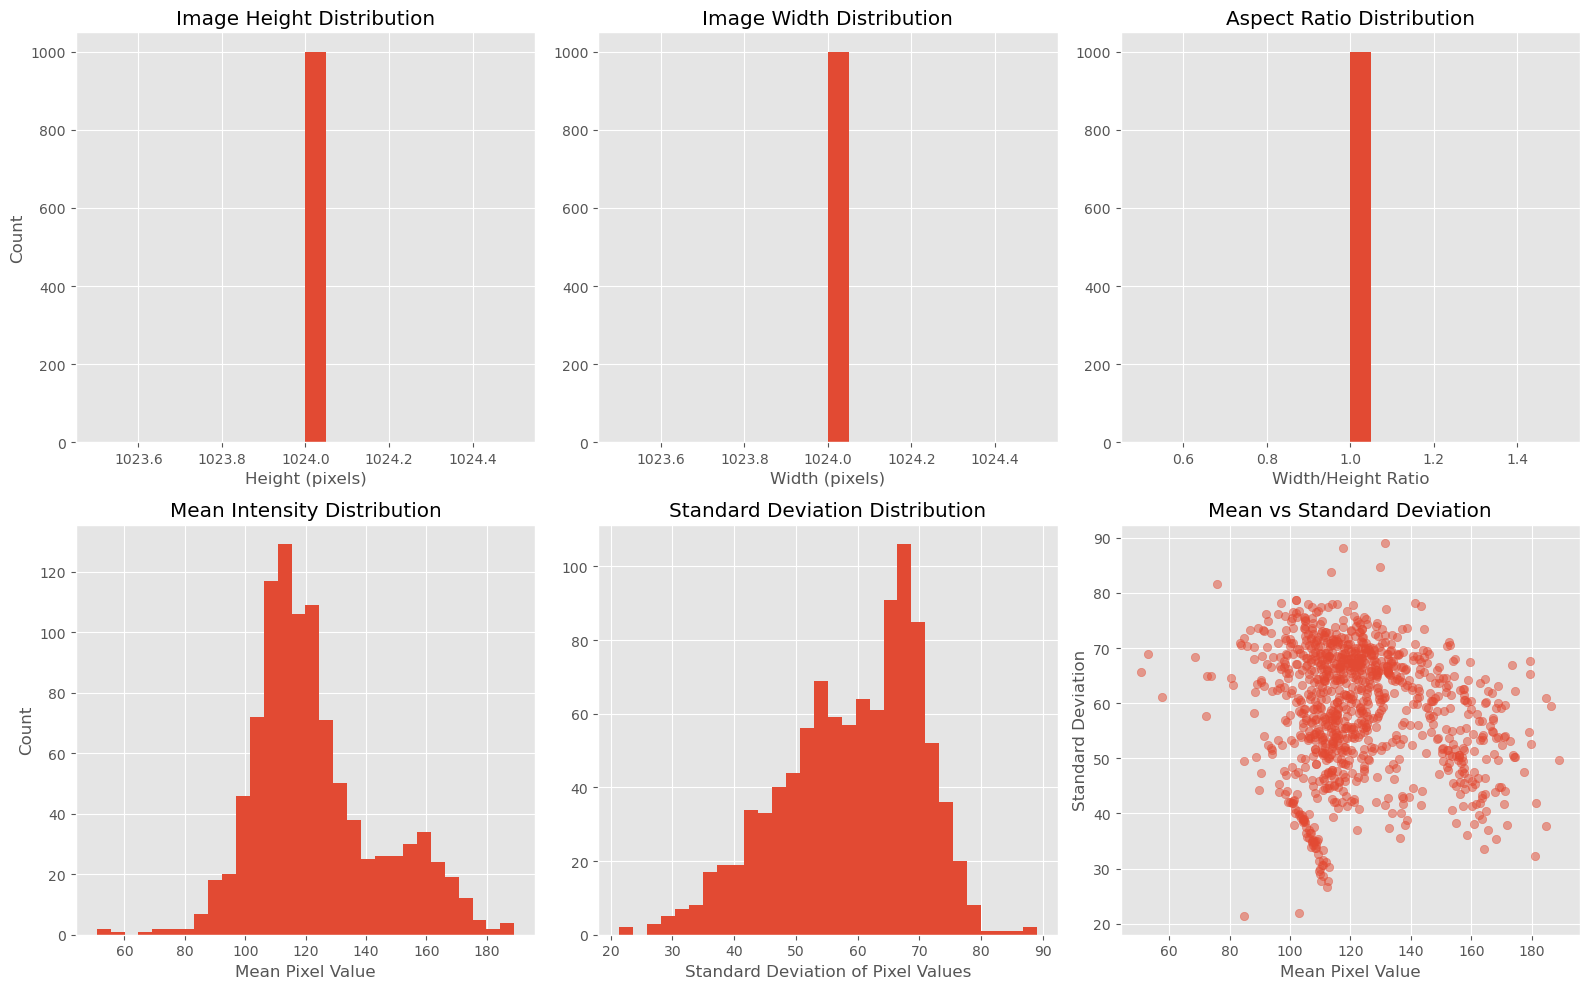

Image dimensions:
  Height: min=1024, max=1024, mean=1024.0
  Width: min=1024, max=1024, mean=1024.0
  Aspect ratio: min=1.000, max=1.000, mean=1.000
Pixel intensities:
  Mean: min=50.8, max=189.1, avg=123.1
  Std: min=21.4, max=89.0, avg=58.9

Found 1 unique image dimensions
  (1024, 1024): 1000 images (100.0%)


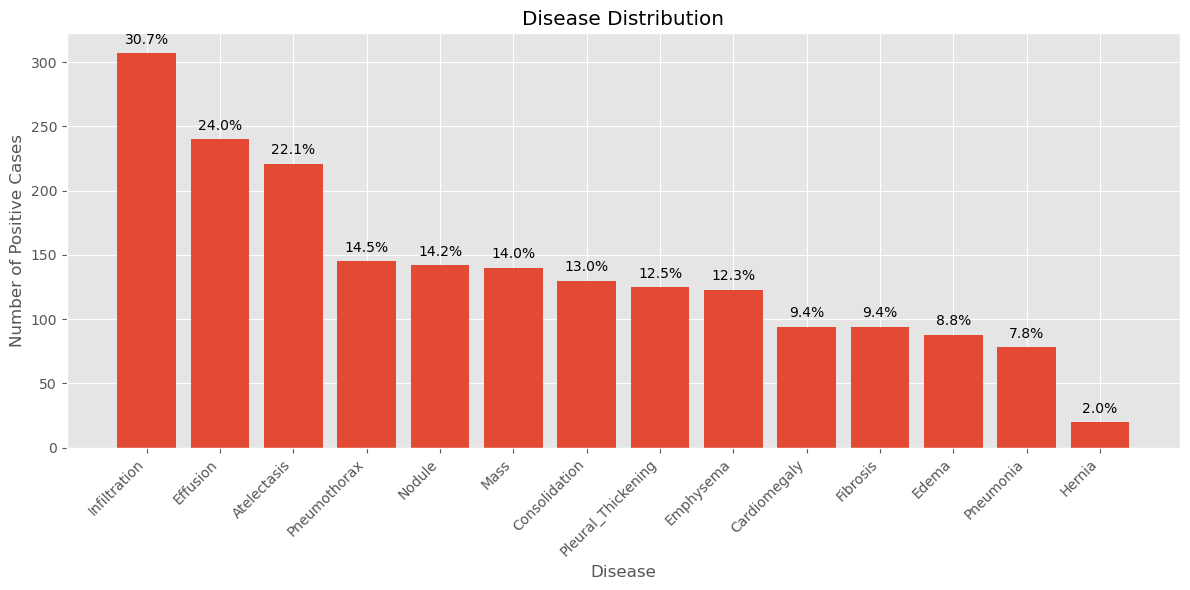

Calculating disease co-occurrences...


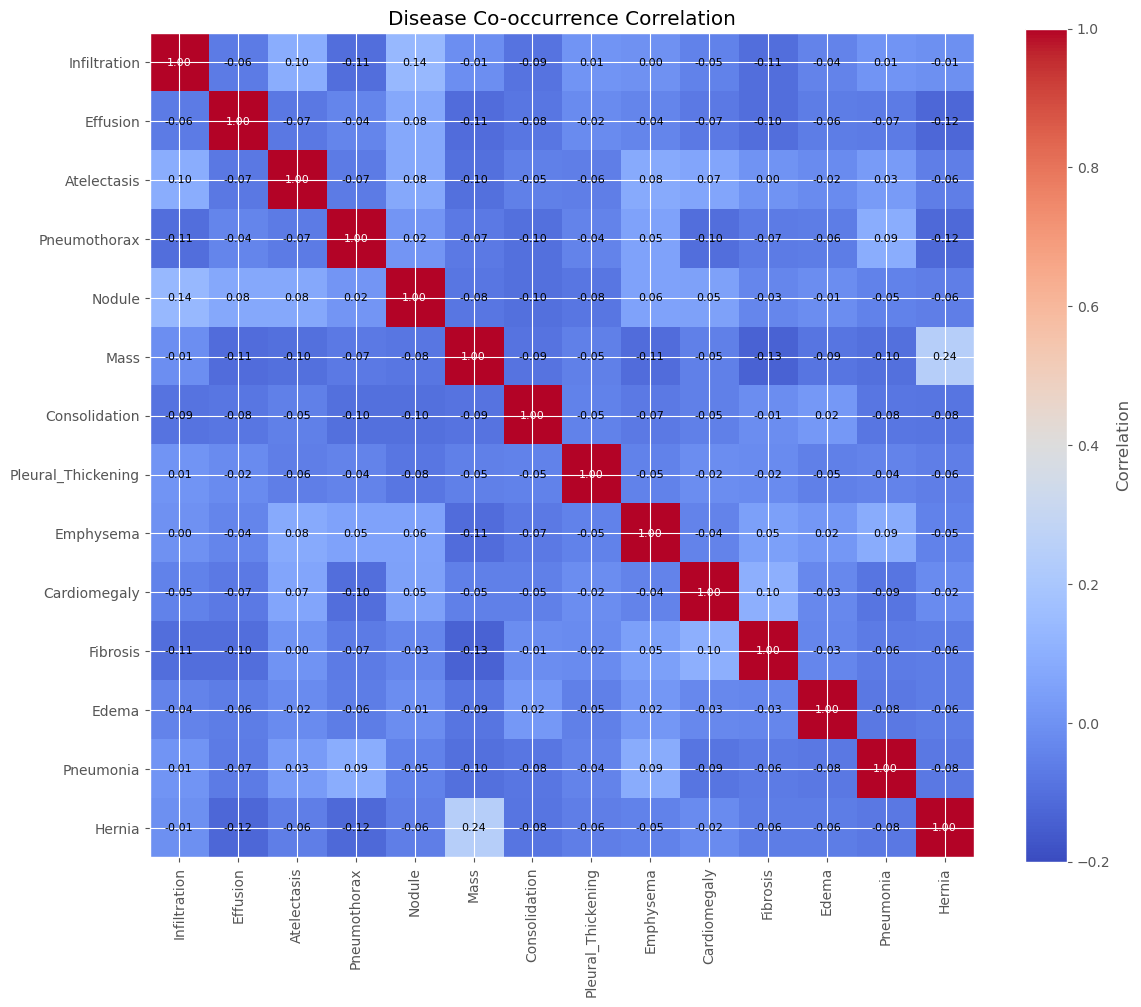


Most common disease combinations:
  Emphysema: 39 cases (3.9%)
  Atelectasis: 38 cases (3.8%)
  Pleural_Thickening: 38 cases (3.8%)
  Infiltration: 37 cases (3.7%)
  Pneumothorax: 37 cases (3.7%)
  Fibrosis: 37 cases (3.7%)
  Cardiomegaly: 33 cases (3.3%)
  Nodule: 32 cases (3.2%)
  Mass: 32 cases (3.2%)
  Edema: 27 cases (2.7%)


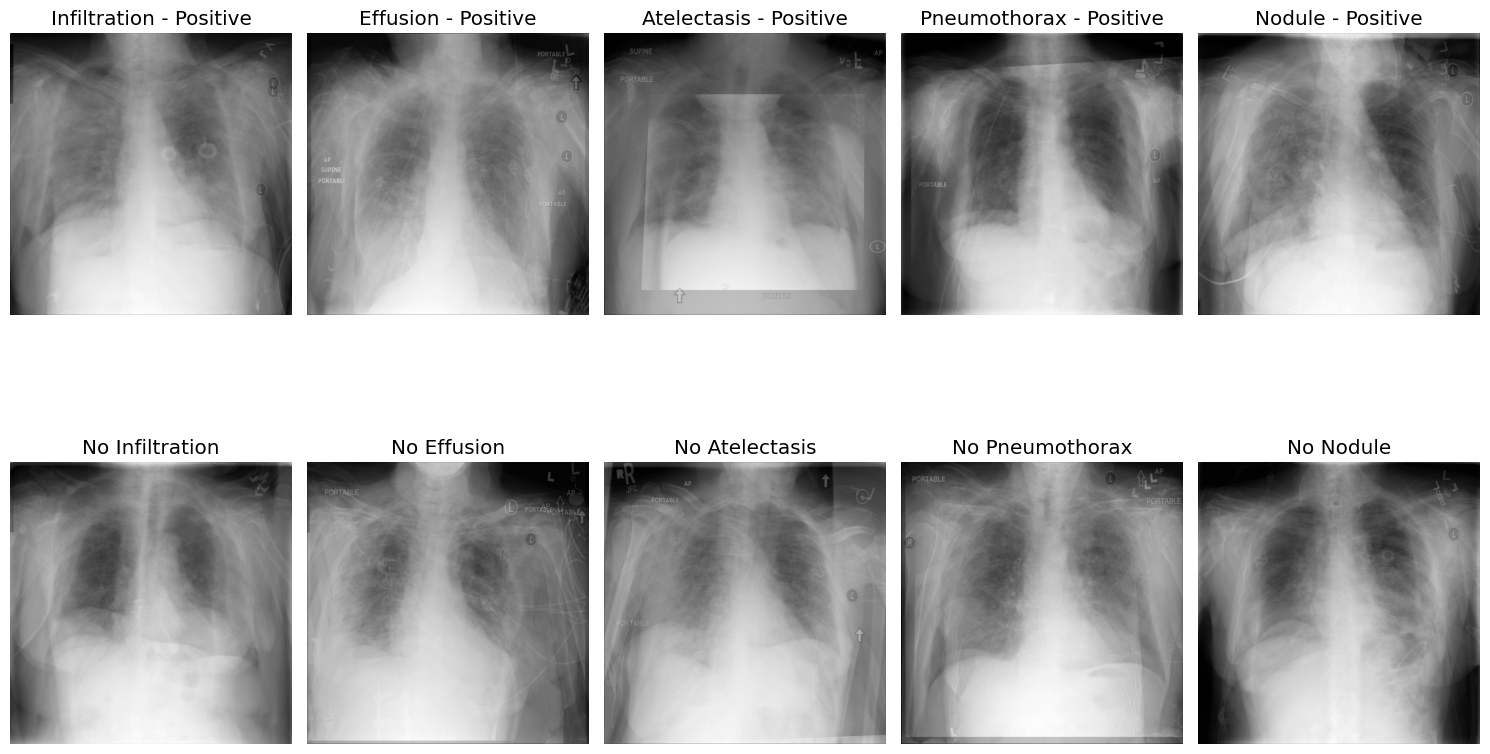

In [ ]:
# Run the EDA functions on your loaded images

# Analyze basic image properties
analyze_image_properties(train_images)

# Analyze disease distribution
analyze_disease_distribution(train_labels, filtered_train_df)

# Visualize pixel intensity distributions by disease
visualize_pixel_intensity_by_disease(train_images, train_labels)

In [ ]:
import torch

print(torch.cuda.is_available())

True


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm  # Using tqdm.notebook for Jupyter
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    confusion_matrix, classification_report
)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms

In [ ]:
import torch

# Number of available GPUs
num_gpus = torch.cuda.device_count()
print(f"Number of GPUs available: {num_gpus}")

# List each GPU
for i in range(num_gpus):
    gpu_name = torch.cuda.get_device_name(i)
    print(f"GPU {i}: {gpu_name}")


Number of GPUs available: 1
GPU 0: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [ ]:
try:
    from efficientnet_pytorch import EfficientNet
except ImportError:
    print("EfficientNet not installed. Run: !pip install efficientnet_pytorch")
    # Define a fallback option if import fails
    class EfficientNetFallback:
        @staticmethod
        def from_pretrained(*args, **kwargs):
            raise ImportError("EfficientNet not installed. Run: !pip install efficientnet_pytorch")
    EfficientNet = EfficientNetFallback